### Bibliotecas

**Instalando API ChatGPT**

In [ ]:
!pip install openai

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import openai

### Importando e visualizando os dados

**Importando a base de dados**

In [5]:
dados = pd.read_csv('feedbacks.csv', sep=';')
dados

,nota,comentario
0,9,Esse óleo de barba é incrível! Minha barba est...
1,10,Adorei esse óleo de barba! Hidratação perfeita...
2,8,Recomendo muito esse óleo de barba. Minha barb...
3,7,Ótimo óleo de barba. Textura leve e hidratação...
4,10,Meu novo óleo de barba favorito! Aroma suave e...
...,...,...
94,7,"Esse óleo de barba é bom, mas demora um pouco ..."
95,9,Estou muito satisfeito com a qualidade desse ó...
96,8,Esse óleo de barba é eficiente. Minha barba es...
97,10,Adoro usar esse óleo de barba. Minha barba fic...


**Visualizando os dadods**

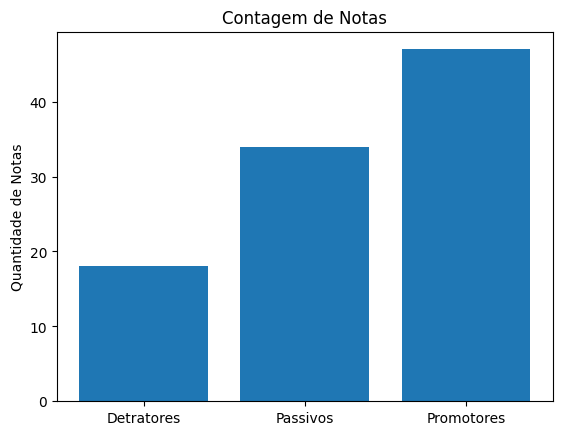

In [7]:
notas = dados['nota']

contagens_detratores = len(notas[notas <= 6])
contagens_passivos = len(notas[(notas >= 7) & (notas <= 8)])
contagens_promotores = len(notas[notas >= 9])
labels = ['Detratores', 'Passivos', 'Promotores']
valores = [contagens_detratores, contagens_passivos, contagens_promotores]
fig, ax = plt.subplots()
ax.bar(labels, valores)

ax.set_ylabel('Quantidade de Notas')
ax.set_title('Contagem de Notas')

plt.show()

### Calculando e visualizando NPS a partir do feedback


**Calculando NPS com base no feedback**

In [9]:
nota = dados['nota']

detratores = 0
promotores = 0

for nota in notas:
  if nota >= 9:
    promotores += 1
  elif nota <= 6:
    detratores += 1

nps = (promotores - detratores) / len(notas) * 100

print(nps)

29.292929292929294


**Visualizando o calculo NPS no gráfico**

In [11]:
nps_zonas = ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
nps_valores = [-100, 0, 50, 75, 100]
nps_cores = ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

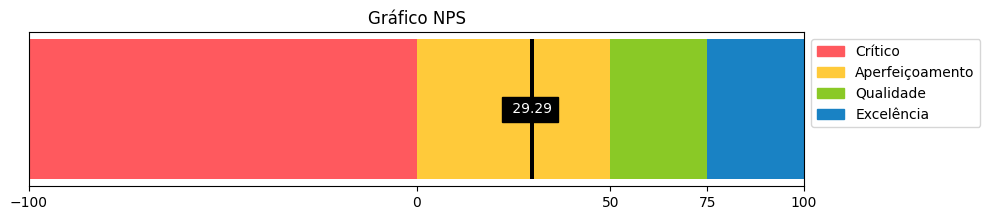

In [12]:
fig, ax = plt.subplots(figsize=(10,2))

for i, zona in enumerate(nps_zonas):
  ax.barh([0], width=nps_valores[i+1] - nps_valores[i], left=nps_valores[i], color=nps_cores[i])

patches = [mpatches.Patch(color=nps_cores[i], label=nps_zonas[i]) for i in range(len(nps_zonas))]
plt.legend(handles=patches, bbox_to_anchor=(1, 1))
ax.barh([0], width=1, left=nps, color='black')
ax.set_xlim(-100, 100)
ax.set_xticks(nps_valores)
ax.set_yticks([])

plt.text(nps, 0, f'{nps: .2f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

plt.title('Gráfico NPS')

plt.show()

## **Analisando sentimentos com ChatGPT**

**API Key**

In [ ]:
openai_api_key =
openai.api_key = openai_api_key

**Implementando classe para feedback**

In [ ]:
class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

feedbacks = dados.apply(lambda linha: Feedback(linha['nota'], linha['comentario']), axis=1)

for feedback in feedbacks:
    print(f"Nota: {feedback.nota}, Comentário: {feedback.comentario}")

**Analisando sentimentos**

In [ ]:
def analisar_sentimentos(feedbacks):

  comentarios_formatados = "\n".join([f"- Nota {feedback.nota}! {feedback.comentario}" for feedback in feedbacks])

  prompt = f"""
            Sintetize uma análise geral sobre os seguintes comentário:
            {comentarios_formatados}
            """

  respostaAPI = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
      {
          "role": "system",
          "content": "Você é um modelo de análise de sentimentos com foco em feedbacks sobre experiências educacionais."
      },
      {
          "role": "user",
          "content": prompt
      }
    ]
  )
  return respostaAPI.choices[0].message.content

resposta = analisar_sentimentos(feedbacks)
print(resposta)